In [99]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd


In [7]:
stations=pd.read_csv("station.csv")
trips = pd.read_csv("trip.csv")
trips=trips=trips.loc[trips.start_date.str.contains('8/'+'\S'+'/2014')]
trips=trips.loc[:,('start_station_name','start_station_id','end_station_name','end_station_id')]
stations=stations.loc[:]

In [4]:
import pyspark

try: 
    type(sc)
except NameError:
    sc = pyspark.SparkContext('local[*]')
    
import pyspark_csv as pycsv
sc.addPyFile('pyspark_csv.py')

In [9]:
import pyspark.sql as pysql

sqlCtx = pysql.SQLContext(sc)

In [10]:
trip_rdd=sc.textFile('trip.csv')
trips_df =pycsv.csvToDataFrame(sqlCtx,trip_rdd)

NameError: name 'trips' is not defined

In [14]:
#el rdd de los trips
data=trips_df.rdd

In [114]:
#de la forma ( (start_station_id,end_station_id) , 1)  
frecuency=data.map(lambda x: ((x.start_staton_id,x.end_station_id),1) ).reduceByKey(lambda x,y:x+y).collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 37.0 failed 1 times, most recent failure: Lost task 1.0 in stage 37.0 (TID 65, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 174, in main
    process()
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 169, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/pyspark/rdd.py", line 2407, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/pyspark/rdd.py", line 2407, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/pyspark/rdd.py", line 346, in func
    return f(iterator)
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/pyspark/rdd.py", line 1828, in combineLocally
    merger.mergeValues(iterator)
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/shuffle.py", line 236, in mergeValues
    for k, v in iterator:
  File "<ipython-input-114-41a52928f4af>", line 2, in <lambda>
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/sql/types.py", line 1502, in __getattr__
    raise AttributeError(item)
AttributeError: start_staton_id

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:390)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:282)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1918)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1931)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1944)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1958)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:935)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:934)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:453)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:57)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:606)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 174, in main
    process()
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 169, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/pyspark/rdd.py", line 2407, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/pyspark/rdd.py", line 2407, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/pyspark/rdd.py", line 346, in func
    return f(iterator)
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/pyspark/rdd.py", line 1828, in combineLocally
    merger.mergeValues(iterator)
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/shuffle.py", line 236, in mergeValues
    for k, v in iterator:
  File "<ipython-input-114-41a52928f4af>", line 2, in <lambda>
  File "/home/leonardo/Software/spark-2.1.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/sql/types.py", line 1502, in __getattr__
    raise AttributeError(item)
AttributeError: start_staton_id

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:390)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:282)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	... 1 more


In [62]:
trips_df.registerTempTable('trips')

In [80]:
max_index=sqlCtx.sql('select max(start_station_id) from trips').collect()
matrix=[ np.zeros(max_index+1) for i in range(max_index+1)]


for (row,col),val in frecuency:
    matrix[row][col]=val

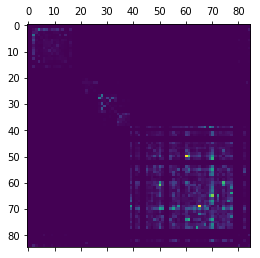

In [115]:

%matplotlib inline

plot.matshow(matrix)
plot.show()


[((7, 3), 59),
 ((56, 51), 209),
 ((46, 42), 88),
 ((64, 51), 257),
 ((54, 58), 17),
 ((61, 76), 542),
 ((23, 26), 38),
 ((64, 41), 241),
 ((77, 76), 489),
 ((50, 39), 676),
 ((74, 56), 45),
 ((5, 84), 4),
 ((56, 66), 144),
 ((51, 60), 798),
 ((30, 14), 1),
 ((56, 58), 48),
 ((57, 59), 111),
 ((48, 77), 122),
 ((61, 69), 864),
 ((14, 16), 16),
 ((72, 67), 884),
 ((8, 12), 88),
 ((65, 45), 139),
 ((80, 3), 9),
 ((77, 69), 1303),
 ((42, 57), 70),
 ((66, 42), 97),
 ((72, 41), 219),
 ((62, 60), 219),
 ((54, 73), 116),
 ((84, 9), 99),
 ((39, 42), 104),
 ((63, 57), 811),
 ((42, 67), 110),
 ((55, 71), 144),
 ((71, 41), 175),
 ((13, 13), 85),
 ((47, 64), 536),
 ((71, 71), 619),
 ((82, 61), 474),
 ((45, 71), 282),
 ((2, 12), 190),
 ((14, 84), 37),
 ((60, 70), 1312),
 ((34, 70), 2),
 ((56, 39), 411),
 ((72, 74), 393),
 ((64, 39), 289),
 ((54, 46), 99),
 ((34, 32), 1),
 ((50, 70), 3033),
 ((61, 56), 498),
 ((54, 64), 122),
 ((49, 82), 196),
 ((39, 35), 1),
 ((31, 70), 1),
 ((11, 4), 42),
 ((74, 4